<p style='text-align: justify;'>
<b>Ejercicio 3:</b> Repita el entrenamiento realizado para el ejercicio 1, pero entrenando con los archivos OR 50 trn.csv y OR 90 trn.csv, y sus correspondientes OR 50 tst.csv y OR 90 tst.csv para test. Estos datos fueron generados de la misma forma que los usados en el primer ejercicio, pero utilizando desviaciones aleatorias de 50 % y 90 %, respectivamente. Analice y discuta los resultados.</p>

#### Librerías

In [150]:
import random
import numpy as np
import csv
import matplotlib.pyplot as plt

#### Entrenamiento
Obtenemos las *cant_e* entradas y la salida esperada para cada patrón a partir del archivo de texto *trn*.

In [151]:
trn = np.loadtxt('./data/OR_90_trn.csv',delimiter=',')

yd = [] # Salida esperadas
for i in range(len(trn)): 
    fila = trn[i]
    cant_e = len(fila) - 1 # Cantidad de entradas
    yd.append(fila[cant_e]) # Salidas esperadas
    aux = [-1]
    for j in range(cant_e):
        aux.append(fila[j])
    trn[i] = aux # Vector de entradas

Inicializamos al azar el vector de pesos, cuyo tamaño será la cantidad de entradas más uno (correspondiente al peso w0: sesgo o umbral de la neurona).

In [152]:
w = [] # Vector de pesos
for i in range(cant_e+1):
    aux = random.uniform(-0.5,0.5)
    w.append(aux)

Se realiza el algoritmo con dos criterios de parada: máximo de épocas (iteraciones) y porcentaje máximo de error.

In [153]:
epoca = 0
epoca_max = 100 # Máximo de iteraciones
cont_error = 0
gamma = 0.1 # Velocidad de aprendizaje
errores = np.zeros(epoca_max)
perc_error_max = 0.02 # Porcentaje máximo de error
error_max = perc_error_max * len(trn) # Cantidad máxima de errores

while (epoca < epoca_max):
    cont_error = 0
    for patron in range(len(trn)):
        x = trn[patron] # Entradas
        y = w @ x
        y = np.sign(y)

        error = yd[patron] - y
        if error != 0: cont_error += 1 

        w = w + gamma*error*x # Corrijo pesos

    errores[epoca] = cont_error
    if cont_error < error_max: break
    epoca += 1

Obtenemos gráfica del error en el entrenamiento a medida que pasan las épocas.

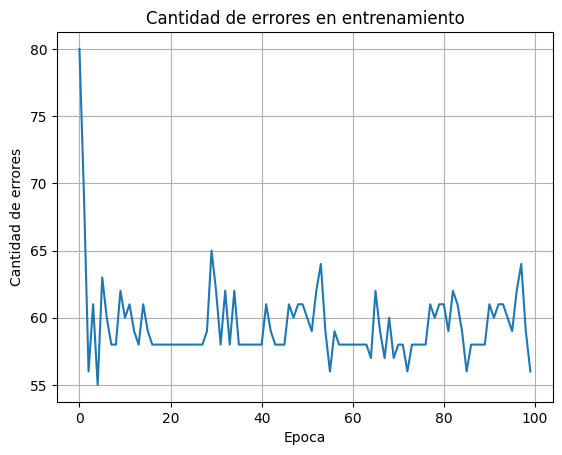

In [154]:
fig,ax = plt.subplots()
plt.plot(range(epoca_max),errores)
ax.set(xlabel = 'Epoca',ylabel='Cantidad de errores')
plt.title('Cantidad de errores en entrenamiento')
ax.grid()
plt.show()

#### Prueba
Repetimos el proceso de carga de datos y paso los patrones por la red obtenida para evaluar el desempeño de la misma.

In [155]:
tst = np.loadtxt('./data/OR_90_tst.csv',delimiter=',')

yd = [] # Salida esperadas
for i in range(len(tst)): 
    fila = tst[i]
    cant_e = len(fila) - 1 # Cantidad de entradas
    yd.append(fila[cant_e]) # Salidas esperadas
    aux = [-1]
    for j in range(cant_e):
        aux.append(fila[j])
    tst[i] = aux # Vector de entradas

cont_error = 0
for patron in range(len(tst)):
    x = tst[patron] # Entradas
    y = w @ x
    y = np.sign(y)

    error = yd[patron] - y
    if error != 0: cont_error += 1

print('Pesos:',w)
print('Cantidad de errores en la prueba:',cont_error,'/',len(tst))

Pesos: [-1.77899337  1.28371579  1.35164297]
Cantidad de errores en la prueba: 12 / 200


#### Conclusiones
La dispersión del 50% converge de manera rápida, necesitando sólamente de una época para bajar la cantidad de errores a 0. Mientras tanto, la dispersión del 90% no converge, sino que la cantidad de errores varía entre las proximidades de 60 (aproximadamente 6% de porcentaje de error). Si usamos el script de animación del ejercicio 2, es posible ver gráficamente que la recta nunca logra acomodarse a todos los puntos con dispersión de 90% (/resultados/animacion_90%.gif), pero sí a la de 50% (/resultados/animacion_50%.gif).